In [14]:
import ast
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',None)

In [2]:
# load original audio_features_merged file

af = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv')

In [3]:
af.shape

(29383, 23)

In [4]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    29383 non-null  object 
 1   performer                  29383 non-null  object 
 2   song                       29383 non-null  object 
 3   spotify_genre              25232 non-null  object 
 4   spotify_track_duration_ms  24286 non-null  float64
 5   spotify_track_explicit     24286 non-null  object 
 6   spotify_track_album        24280 non-null  object 
 7   danceability               24224 non-null  float64
 8   energy                     24224 non-null  float64
 9   key                        24224 non-null  float64
 10  loudness                   24224 non-null  float64
 11  mode                       24224 non-null  float64
 12  speechiness                24224 non-null  float64
 13  acousticness               24224 non-null  flo

In [6]:
af.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's music""]",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.006990,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.127000,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,"[""children's music"", 'nursery']",196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
3,Bad DayAlvin And The Chipmunks,Alvin And The Chipmunks,Bad Day,"[""children's music""]",214666.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.692,0.663,9.0,-3.955,1.0,0.0290,0.176000,0.14200,0.1710,0.315,139.995,4.0,35.0,67,2008-01-19,2
4,FunkytownAlvin And The Chipmunks,Alvin And The Chipmunks,Funkytown,"[""children's music""]",214053.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.807,0.742,0.0,-7.013,1.0,0.0563,0.000802,0.92900,0.0812,0.285,123.037,4.0,29.0,86,2008-01-19,2


In [5]:
#confirm uniqueness of song_id column

def is_unique(df,col):
    total_count = len(df[col])
    unique_count = df[col].nunique()
    return total_count == unique_count
    
is_unique(af,'song_id')  

True

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/64496348.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


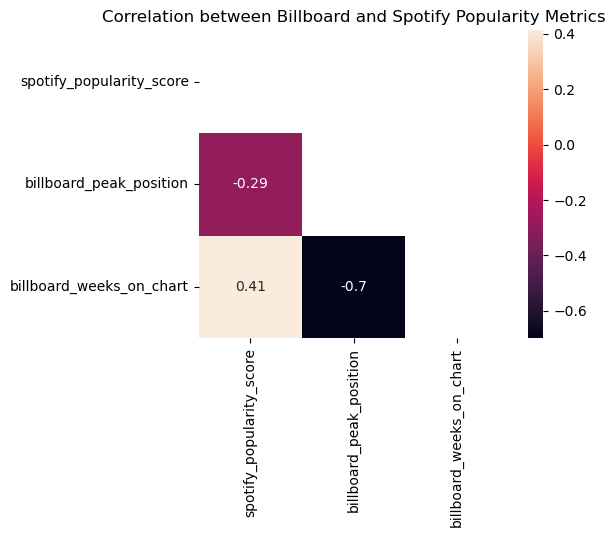

In [11]:
#correlation matrix 1: correlation b/w Spotify and Billboard Popularity

af_corr1 = af[['spotify_track_popularity','peak_position','weeks_on_chart']].copy()

#rename columns
af_corr1.rename(columns={
    'spotify_track_popularity': 'spotify_popularity_score',
    'peak_position': 'billboard_peak_position',
    'weeks_on_chart': 'billboard_weeks_on_chart'
    
}, inplace=True)

corr1 = af_corr1.corr()

#mask to remove unecessary top half of matrix
mask = np.triu(np.ones_like(corr1, dtype=bool))

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(5,4))
sns.heatmap(corr1,mask=mask,annot=True)
plt.title('Correlation between Billboard and Spotify Popularity Metrics')

plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2919600927.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = af_corr2_sorted.corr().round(2)
/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2919600927.py:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


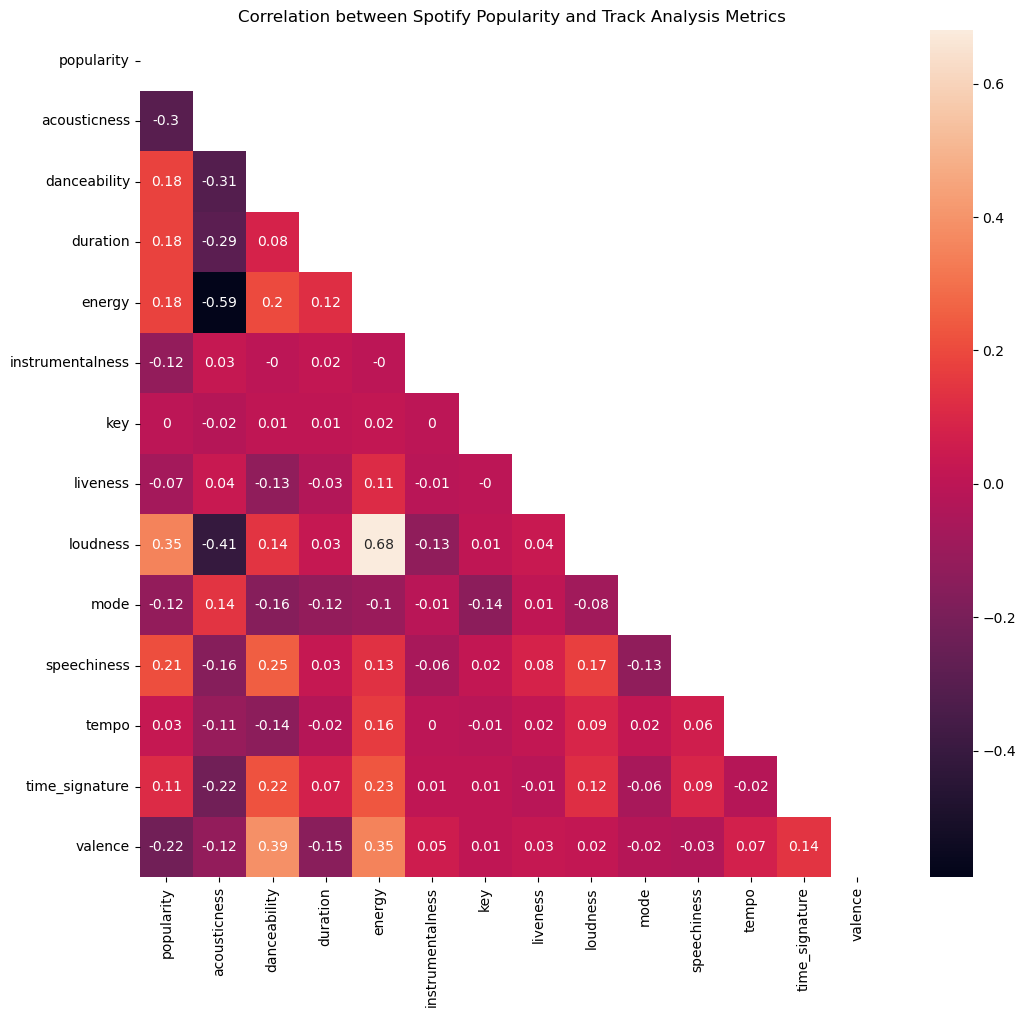

In [12]:
#correlation matrix 2: Spotify Popularity Score and Track Metrics

af_corr2 = af[['spotify_track_popularity',
               'spotify_track_explicit',
               'spotify_track_duration_ms',
               'danceability',
               'energy',
               'key',
               'loudness',
               'mode',
               'speechiness',
               'acousticness',
               'instrumentalness',
               'liveness',
               'valence',
               'tempo',
               'time_signature']].copy()

#rename columns
af_corr2.rename(columns={
    'spotify_track_popularity': 'popularity',
    'spotify_track_explicit': 'explicit',
    'spotify_track_duration_ms': 'duration'
    
}, inplace=True)

#change order for visual
af_corr2_sorted = af_corr2[sorted(af_corr2.columns)] 

#bring popularity score to front
pop = 'popularity'
new_order = [pop] + [i for i in af_corr2_sorted.columns if i != pop]
af_corr2_sorted = af_corr2_sorted[new_order]

corr2 = af_corr2_sorted.corr().round(2)

#mask to remove unecessary top half of matrix
mask = np.triu(np.ones_like(corr2, dtype=bool))

plt.figure(figsize=(12,11))
plt.style.use("seaborn-colorblind")
sns.heatmap(corr2,mask=mask,annot=True)
plt.title('Correlation between Spotify Popularity and Track Analysis Metrics')

plt.show()

##Note: remove top half above diagonal

In [15]:
#convert spotify_genre column to list from string safely using the function below for explode function

def safe_literal_eval(s):
    try:
        # only apply ast.literal_eval if the string starts with '[' and ends with ']'
        if isinstance(s, str) and s.startswith('[') and s.endswith(']'):
            return ast.literal_eval(s)
        return s  # return original string if it's not in list format
    except ValueError:
        return s  # Return original string in case of a ValueError

af['spotify_genre'] = af['spotify_genre'].apply(safe_literal_eval)

In [16]:
#use explode function to get one row per genre per song

af_genre = af.explode('spotify_genre')

af_genre.shape

(132827, 23)

In [17]:
af_genre.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,australian children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
0,Solid RockGoanna,Goanna,Solid Rock,children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,australian children's music,250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,children's music,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,nursery,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15


In [18]:
# Use function below to categorize top 10 genres in dataset
def categorize_genre(genre):
    genre = str(genre)
    
    if 'funk' in genre:
        return 'Funk'
    elif 'blues' in genre:
        return 'Blues'
    elif 'dance' in genre:
        return 'Dance'
    elif 'folk' in genre:
        return 'Folk'
    elif 'hip hop' in genre:
        return 'Hip Hop'
    elif 'country' in genre:
        return 'Country'
    elif 'soul' in genre:
        return 'Soul'
    elif 'rap' in genre:
        return 'Rap'
    elif 'pop' in genre:
        return 'Pop'
    elif 'rock' in genre:
        return 'Rock'
    else:
        return None 

In [19]:
af_genre['genre'] = af_genre['spotify_genre'].apply(categorize_genre)

In [20]:
#remove all songs that didn't fit in to the ten major genre categories

af_genre = af_genre.dropna(subset=['genre'])

print(af_genre.shape)

(89292, 24)


In [21]:
#prep for histogram

af_genre['week_id'] = pd.to_datetime(af_genre['week_id'])

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2637679217.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


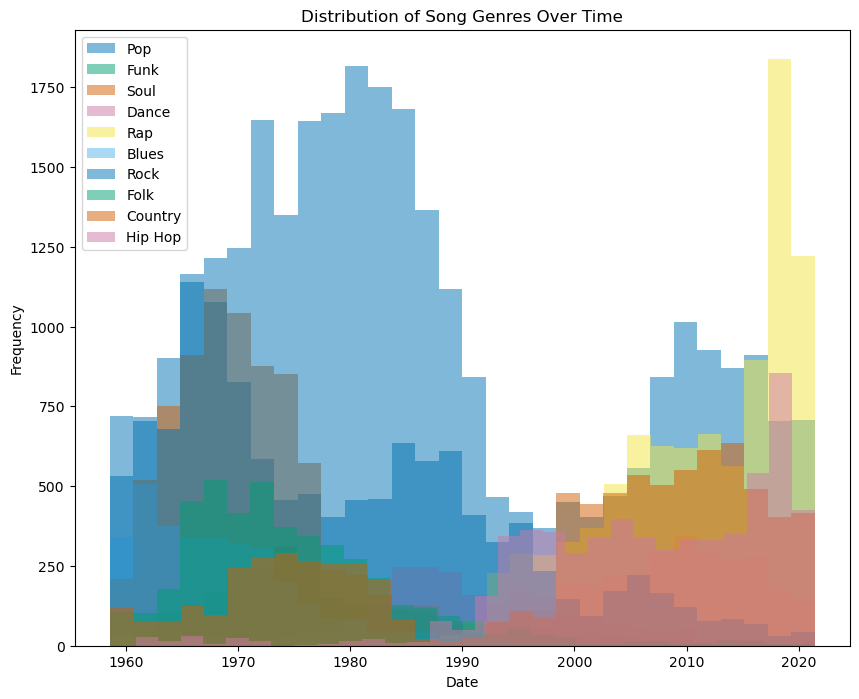

In [22]:
plt.style.use("seaborn-colorblind")

plt.figure(figsize = (10,8))

genres = af_genre['genre'].unique()

for genre in genres:
    subset = af_genre[af_genre['genre'] == genre]
    
    plt.hist(subset['week_id'],bins=30,alpha=0.5,label=genre)
    
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2599864324.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


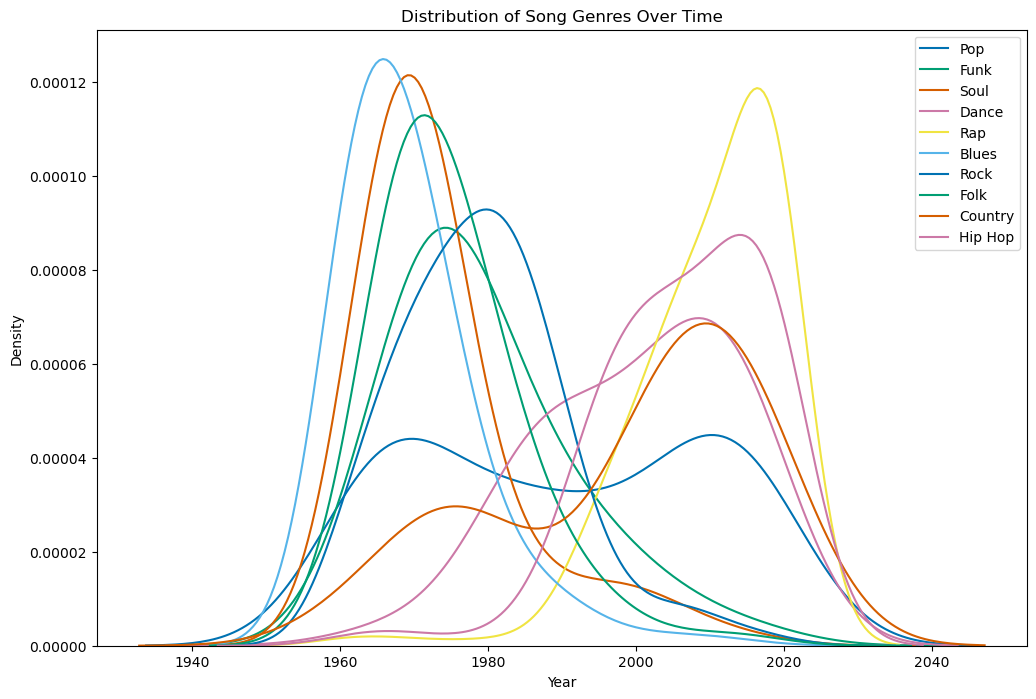

In [30]:
#KDE plot

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

for genre in genres:
    # Filter the DataFrame for the current genre
    subset = af_genre[af_genre['genre'] == genre]

    # Make sure there is enough data to plot
    if not subset.empty:
        # Plot the KDE plot
        sns.kdeplot(subset['week_id'], label=genre, bw_adjust=3)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/1209236740.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


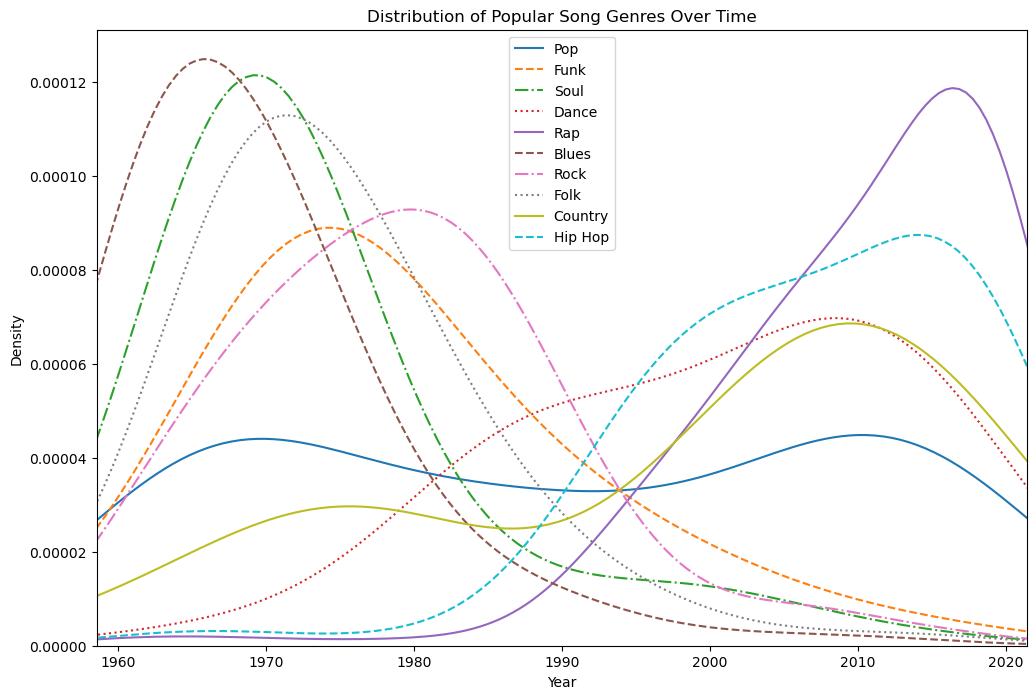

In [39]:
colors = sns.color_palette("tab10", n_colors=10)  # Adjust for the number of genres
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

for idx, genre in enumerate(genres):
    # Ensure there are enough colors and linestyles
    color = colors[idx % len(colors)]
    linestyle = linestyles[idx % len(linestyles)]

    # Filter the DataFrame for the current genre
    subset = af_genre[af_genre['genre'] == genre]

    # Make sure there is enough data to plot
    if not subset.empty:
        # Plot the KDE plot with distinct color and linestyle
        sns.kdeplot(subset['week_id'], label=genre, bw_adjust=3, color=color, linestyle=linestyle)

# Find the min and max values from the 'week_id' column
min_week_id = af_genre['week_id'].min()
max_week_id = af_genre['week_id'].max()

# Set the x-axis range based on the 'week_id' column
plt.xlim(min_week_id, max_week_id)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Popular Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

In [41]:
af_genre.columns

Index(['song_id', 'performer', 'song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'peak_position', 'week_id', 'weeks_on_chart', 'genre'],
      dtype='object')

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2957538828.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


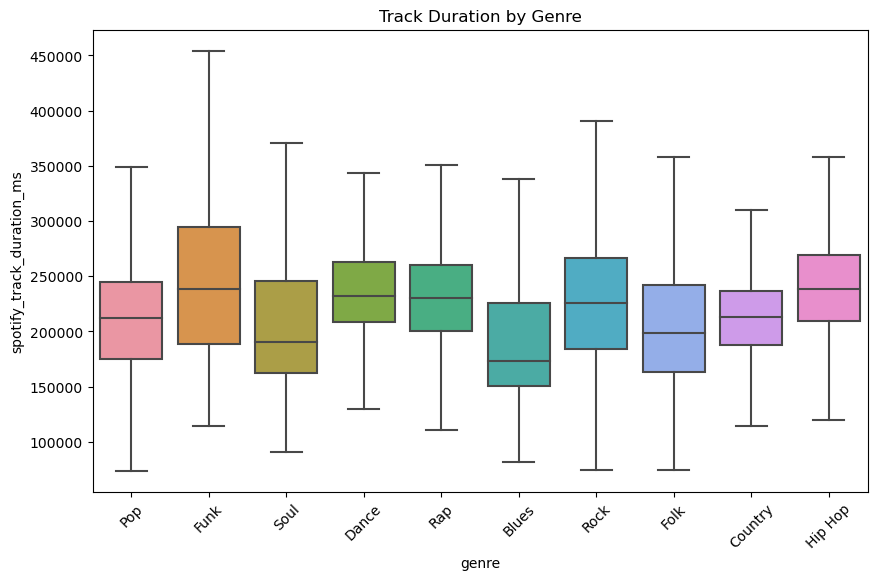

In [44]:
plt.figure(figsize=(10, 6))
plt.style.use("seaborn-colorblind")
sns.boxplot(x='genre', y='spotify_track_duration_ms', data=af_genre,showfliers=False)
plt.xticks(rotation=45)
plt.title('Track Duration by Genre')
plt.show()


/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/1612984357.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


<Figure size 1000x600 with 0 Axes>

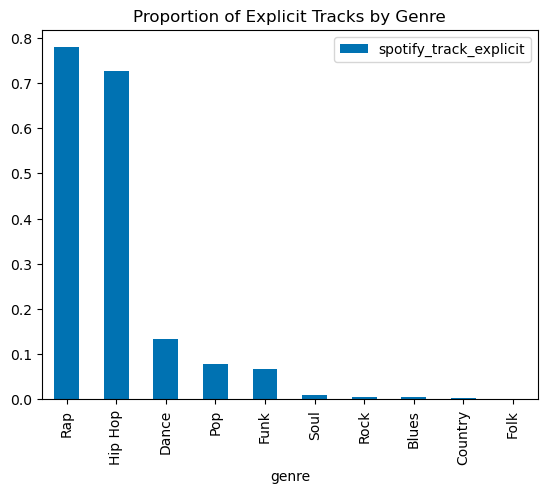

In [54]:
explicit_count = pd.DataFrame(af_genre.groupby('genre')['spotify_track_explicit'].mean())  # Assuming explicit is 1 for True, 0 for False
explicit_count = explicit_count.sort_values(by='spotify_track_explicit',ascending=False)
plt.figure(figsize=(10, 6))
plt.style.use("seaborn-colorblind")
explicit_count.plot(kind='bar')
plt.title('Proportion of Explicit Tracks by Genre')
plt.show()


In [55]:
af_genre.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart,genre
20,"Riff Off: Mickey / Like A Virgin / Hit Me With Your Best Shot...The Barden Bellas, The Treblemakers & The BU Harmonics","The Barden Bellas, The Treblemakers & The BU Harmonics",Riff Off: Mickey / Like A Virgin / Hit Me With Your Best Shot...,post-teen pop,224266.0,False,Ultimate Pitch Perfect (Original Motion Picture Soundtrack),0.571,0.4990,11.0,-5.515,1.0,0.4040,0.554,0.00000,0.0908,0.755,126.434,4.0,52.0,86,2013-02-16,5,Pop
21,Bellas Finals: Price Tag / Don't You (Forget About Me)...The Barden Bellas,The Barden Bellas,Bellas Finals: Price Tag / Don't You (Forget About Me)...,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,2013-02-16,6,Pop
22,"Leaving On A Jet PlanePeter, Paul & Mary","Peter, Paul & Mary",Leaving On A Jet Plane,viral pop,207240.0,False,Album 1700,0.414,0.1670,9.0,-16.519,1.0,0.0484,0.804,0.00000,0.1170,0.384,133.450,4.0,60.0,1,1970-02-14,17,Pop
23,"Don't Think Twice, It's All RightPeter, Paul & Mary","Peter, Paul & Mary","Don't Think Twice, It's All Right",viral pop,196466.0,False,In The Wind,0.437,0.1040,3.0,-22.533,1.0,0.0307,0.893,0.00124,0.1100,0.544,101.718,4.0,58.0,9,1963-11-16,10,Pop
24,"Blowin' In The WindPeter, Paul & Mary","Peter, Paul & Mary",Blowin' In The Wind,viral pop,177360.0,False,In The Wind,0.381,0.0848,5.0,-17.770,1.0,0.0320,0.834,0.00000,0.1120,0.557,155.036,4.0,54.0,2,1963-10-05,15,Pop


In [61]:
mean_df = af_genre.groupby('genre')[['acousticness', 'instrumentalness', 'liveness', 'valence', 
                               'energy', 'danceability', 'loudness', 'speechiness']].mean().reset_index()

In [62]:
mean_df.head(10)

,genre,acousticness,instrumentalness,liveness,valence,energy,danceability,loudness,speechiness
0,Blues,0.432100,0.050010,0.223019,0.690843,0.561601,0.567352,-10.173551,0.056235
1,Country,0.273071,0.006763,0.175885,0.555069,0.643960,0.563794,-7.440638,0.041967
2,Dance,0.162264,0.023528,0.188147,0.599032,0.700498,0.650910,-7.020697,0.079613
3,Folk,0.380443,0.019474,0.186743,0.637827,0.545770,0.551154,-10.686557,0.043514
4,Funk,0.294803,0.056321,0.190700,0.691741,0.612523,0.643008,-9.731808,0.067174
5,Hip Hop,0.140851,0.011617,0.201746,0.541777,0.660581,0.730118,-6.909147,0.203698
6,Pop,0.275992,0.018251,0.191556,0.601755,0.636927,0.594539,-8.054702,0.063977
7,Rap,0.141006,0.008645,0.197012,0.504259,0.658461,0.719520,-6.480257,0.193900
8,Rock,0.263902,0.032341,0.196686,0.636387,0.642215,0.554516,-9.418391,0.046949
9,Soul,0.414260,0.038705,0.201112,0.685060,0.548128,0.599203,-10.061615,0.056029


In [63]:
plt.figure(figsize=(12,8))
plt.style.use("seaborn-colorblind")

genres = mean_df['genre'].unique()
variables = mean_df.columns[1:]
x = np.arange(len(genres))  # the label locations
width = 0.1  # the width of the bars

for i, variable in enumerate(variables):
    plt.bar(x + i*width, melted_df[melted_df['variable'] == variable]['value'], width, label=variable)

# Add some text for labels, title and custom x-axis tick labels
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.title('Average Song Characteristics by Genre')
plt.xticks(x + width * len(variables) / 2 - width / 2, genres, rotation=45)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/4231236268.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


NameError: name 'melted_df' is not defined

<Figure size 1200x800 with 0 Axes>

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/3153753211.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


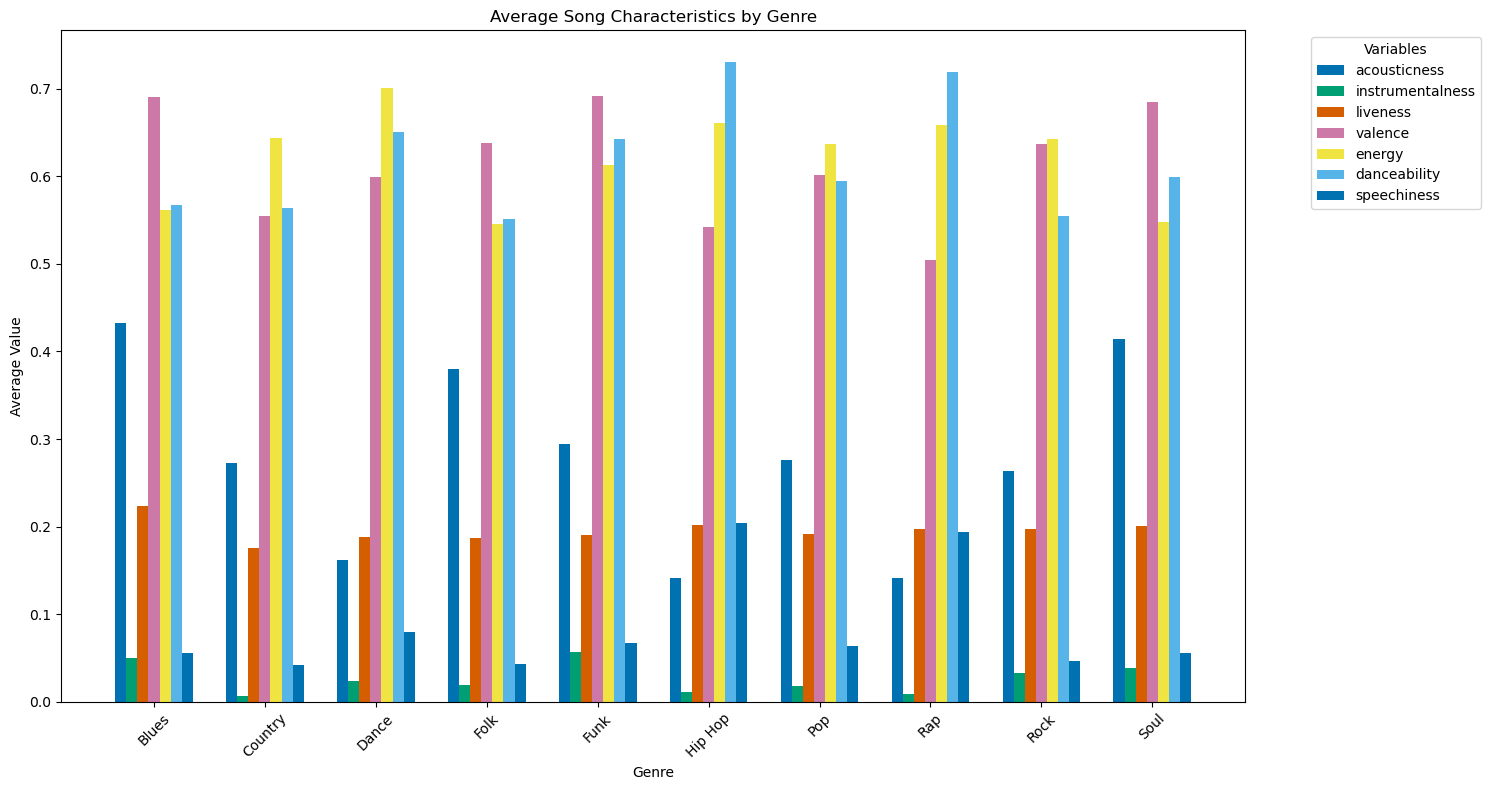

In [67]:

# Drop the 'loudness' column
#mean_df = mean_df.drop(columns=['loudness'])

# Melting the DataFrame for easier plotting
melted_df = pd.melt(mean_df, id_vars='genre', var_name='variable', value_name='value')

# Plotting
plt.figure(figsize=(15, 8))
plt.style.use("seaborn-colorblind")
genres = mean_df['genre'].unique()
variables = mean_df.columns[1:]
x = np.arange(len(genres))  # the label locations
width = 0.1  # the width of the bars

for i, variable in enumerate(variables):
    plt.bar(x + i*width, melted_df[melted_df['variable'] == variable]['value'], width, label=variable)

# Add some text for labels, title and custom x-axis tick labels
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.title('Average Song Characteristics by Genre')
plt.xticks(x + width * (len(variables) / 2) - width / 2, genres, rotation=45)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/4060652359.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


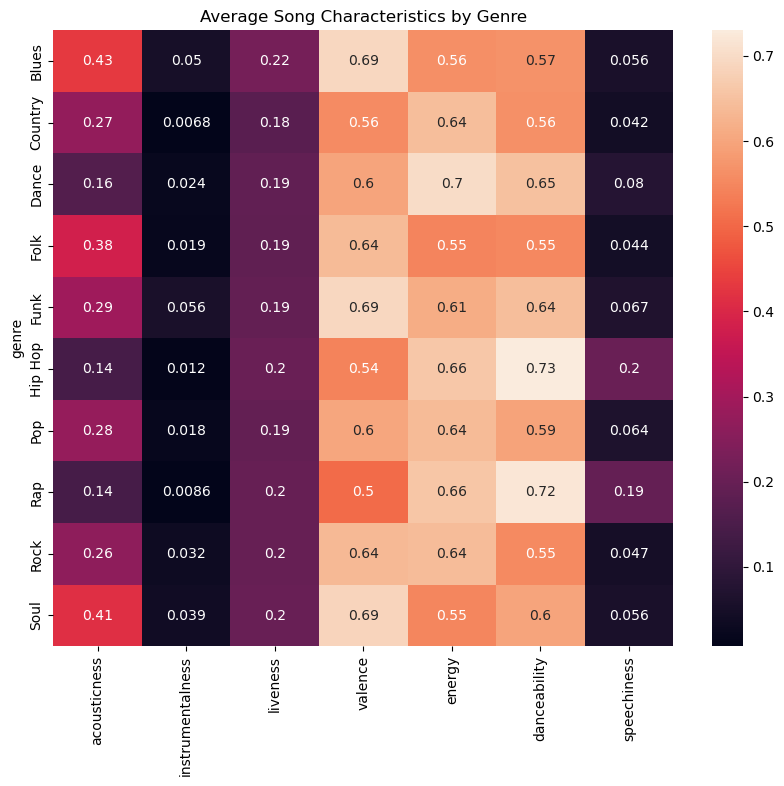

In [75]:
mean_df = af_genre.groupby('genre')[['acousticness', 'instrumentalness', 'liveness', 'valence', 
                               'energy', 'danceability', 'speechiness']].mean()

# Ensure that 'genre' is the index and not part of the data
mean_df.index = mean_df.index.set_names('genre')
mean_df = mean_df.reset_index().set_index('genre')

# Creating a heatmap
plt.figure(figsize=(10, 8))
plt.style.use("seaborn-colorblind")
sns.heatmap(mean_df, annot=True)
plt.title('Average Song Characteristics by Genre')
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/3074494734.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


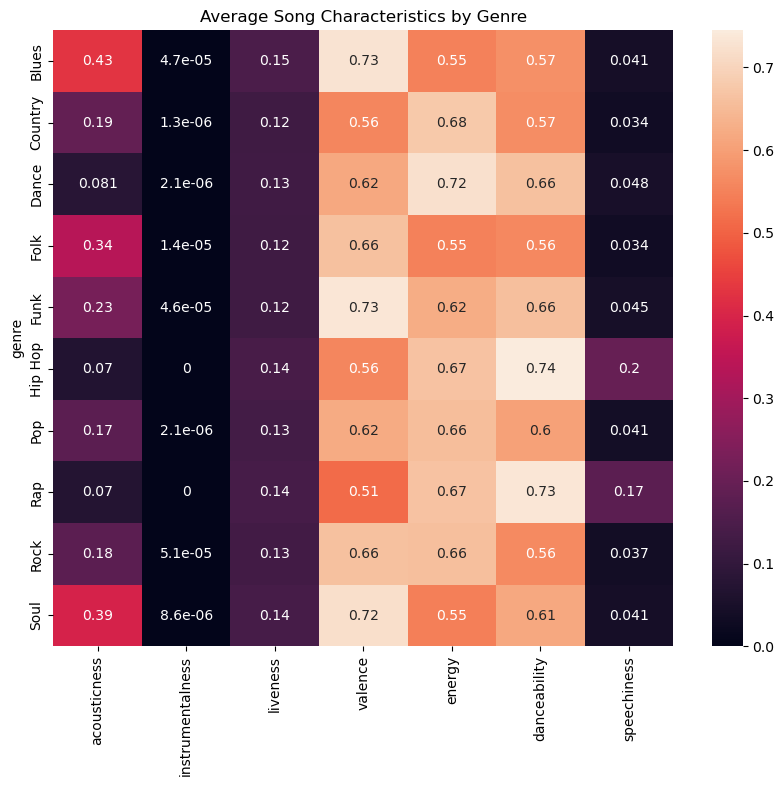

In [89]:
mean_df = af_genre.groupby('genre')[['acousticness', 'instrumentalness', 'liveness', 'valence', 
                               'energy', 'danceability', 'speechiness']].median()

# Ensure that 'genre' is the index and not part of the data
mean_df.index = mean_df.index.set_names('genre')
mean_df = mean_df.reset_index().set_index('genre')

# Creating a heatmap
plt.figure(figsize=(10, 8))
plt.style.use("seaborn-colorblind")
sns.heatmap(mean_df, annot=True)
plt.title('Average Song Characteristics by Genre')
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/3784423764.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


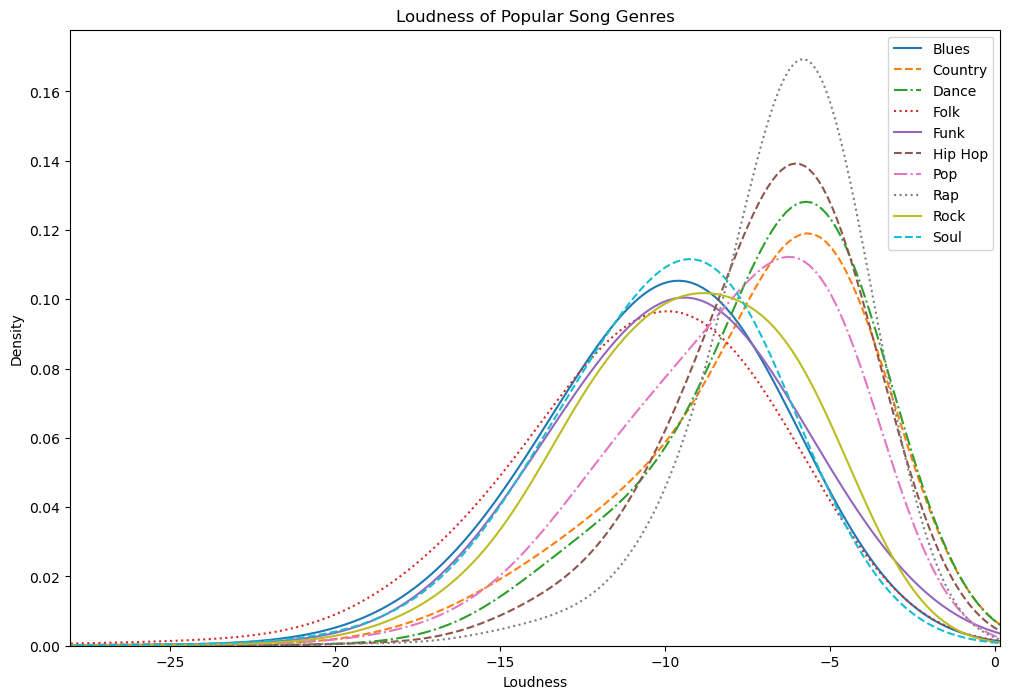

In [83]:
colors = sns.color_palette("tab10", n_colors=10)  # Adjust for the number of genres
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

for idx, genre in enumerate(genres):
    # Ensure there are enough colors and linestyles
    color = colors[idx % len(colors)]
    linestyle = linestyles[idx % len(linestyles)]

    # Filter the DataFrame for the current genre
    subset = af_genre[af_genre['genre'] == genre]

    # Make sure there is enough data to plot
    if not subset.empty:
        # Plot the KDE plot with distinct color and linestyle
        sns.kdeplot(subset['loudness'], label=genre, bw_adjust=3, color=color, linestyle=linestyle)

# Find the min and max values from the 'week_id' column
min_loudness = af_genre['loudness'].min()
max_loudness = af_genre['loudness'].max()

# Set the x-axis range based on the 'week_id' column
plt.xlim(min_loudness, max_loudness)

# Add labels and title
plt.xlabel('Loudness')
plt.ylabel('Density')
plt.title('Loudness of Popular Song Genres')
plt.legend()

# Show the plot
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/2929199134.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


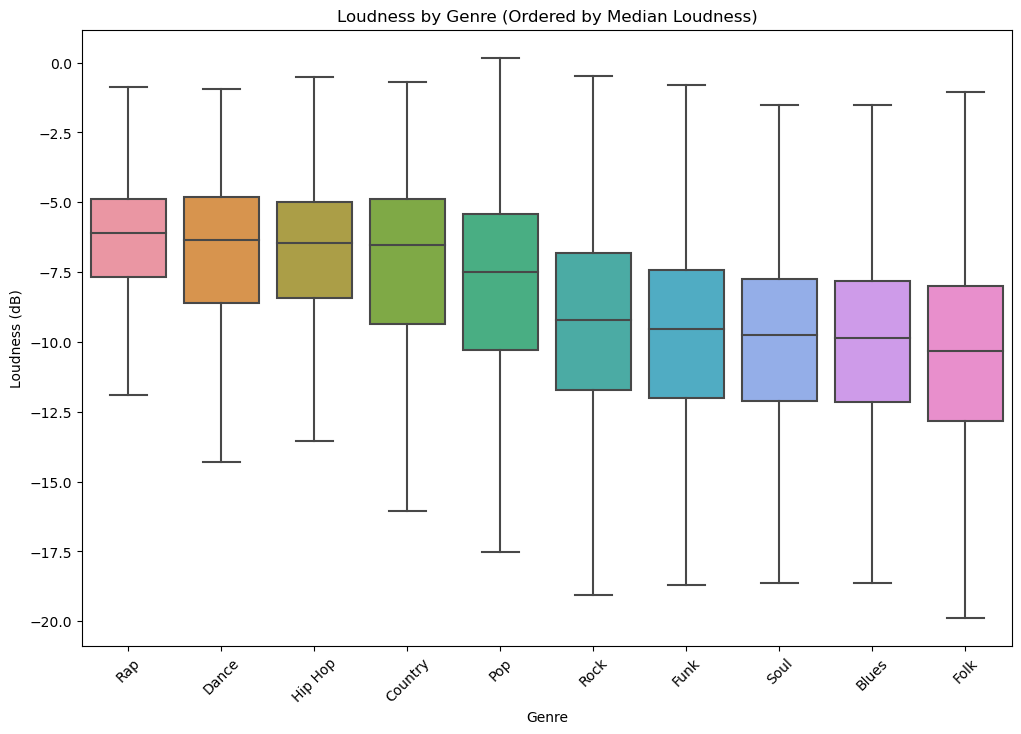

In [87]:
#get loudness median values

median_loudness = af_genre.groupby('genre')['loudness'].median().sort_values(ascending=False)

sorted_genres = median_loudness.index.tolist()
sorted_df = af_genre.set_index('genre').loc[sorted_genres].reset_index()

plt.figure(figsize=(12, 8))
plt.style.use("seaborn-colorblind")
sns.boxplot(x='genre', y='loudness', data=sorted_df, order=sorted_genres,showfliers=False)
plt.xticks(rotation=45)
plt.title('Loudness by Genre (Ordered by Median Loudness)')
plt.xlabel('Genre')
plt.ylabel('Loudness (dB)')
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_1300/434882338.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


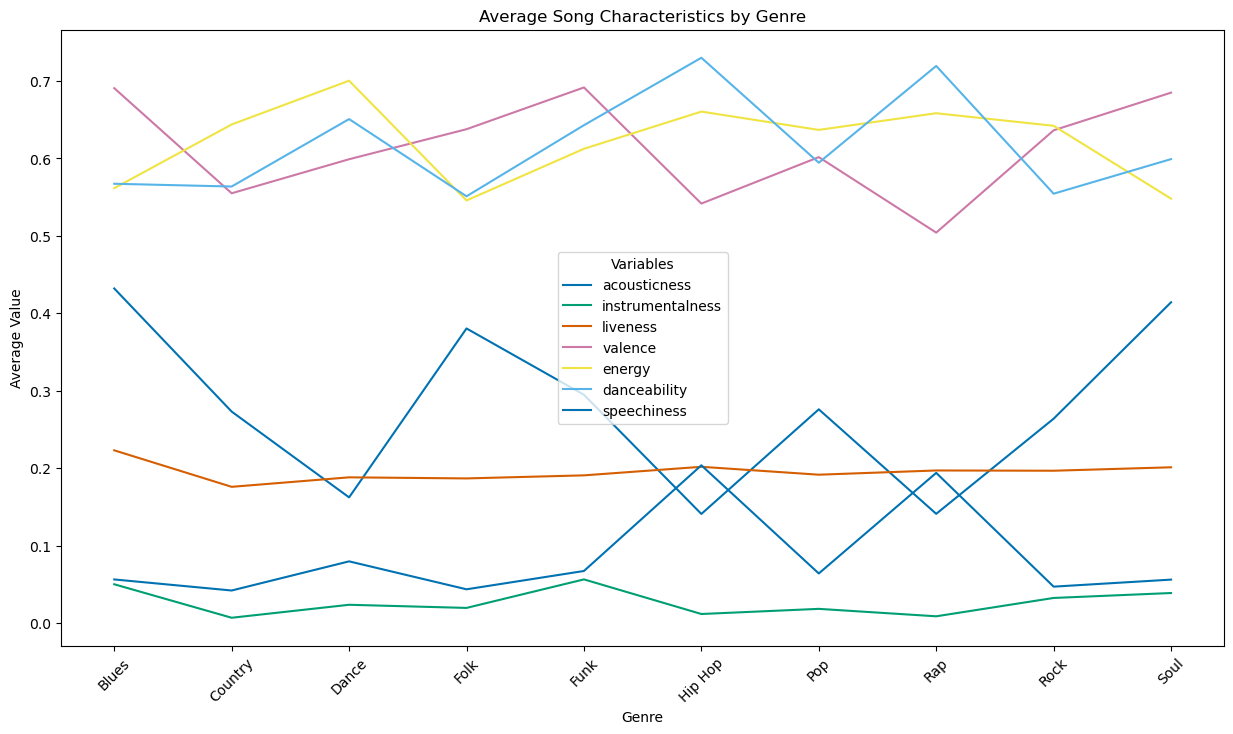

In [88]:
mean_df = af_genre.groupby('genre')[['acousticness', 'instrumentalness', 'liveness', 'valence', 
                               'energy', 'danceability', 'speechiness']].mean()

# Ensure that 'genre' is the index and not part of the data
mean_df.index = mean_df.index.set_names('genre')
mean_df = mean_df.reset_index().set_index('genre')

plt.figure(figsize=(15, 8))
plt.style.use("seaborn-colorblind")

# Plotting each variable as a separate line
for column in mean_df.columns:
    plt.plot(mean_df.index, mean_df[column], label=column)

# Add labels, title, and legend
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.title('Average Song Characteristics by Genre')
plt.xticks(rotation=45)
plt.legend(title='Variables')

plt.show()